In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### 直方图  hist()

价格直方图

获取一个dataframe,并用直方图显示:

In [28]:
stock1 = pd.read_excel('sz50.xlsx',sheetname='600036.XSHG', index_col='datetime')

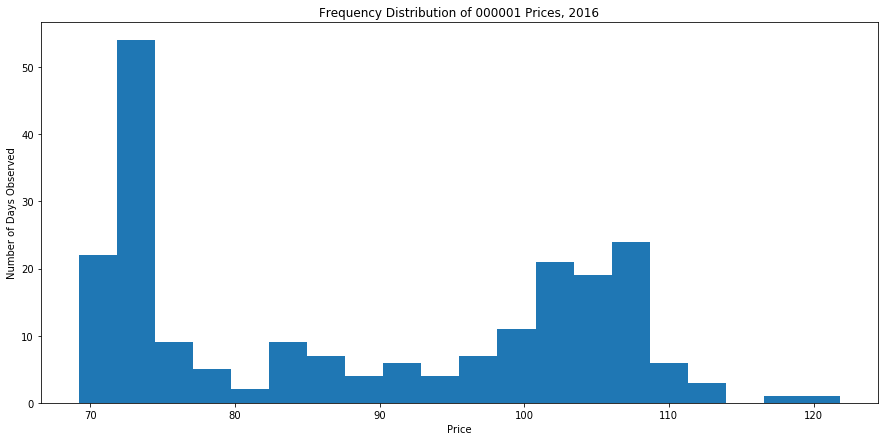

In [31]:
plt.figure(figsize=(15, 7))
plt.hist(stock1.close, bins=20)
plt.xlabel('Price')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of 000001 Prices, 2016')
plt.show()

### #回报率直方图：

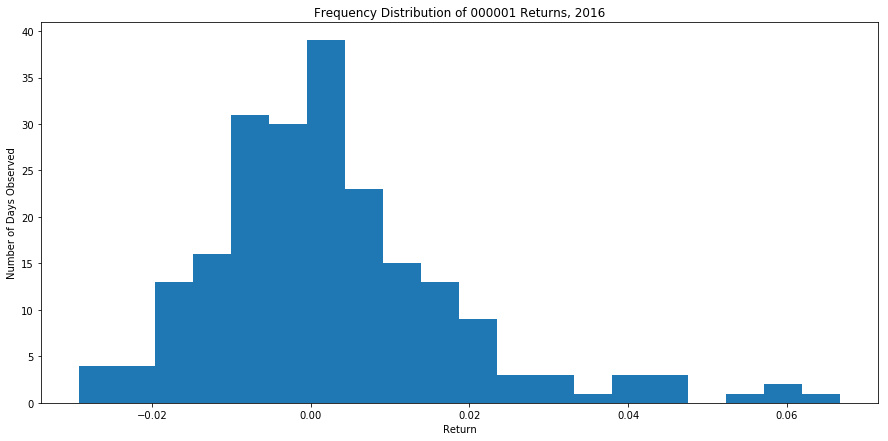

In [32]:
R1 = stock1.close.pct_change()[1:]
# 20 bins，代表柱的数量
plt.figure(figsize=(15, 7))
plt.hist(R1, bins=20)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Frequency Distribution of 000001 Returns, 2016')
plt.show()

### #累积直方图

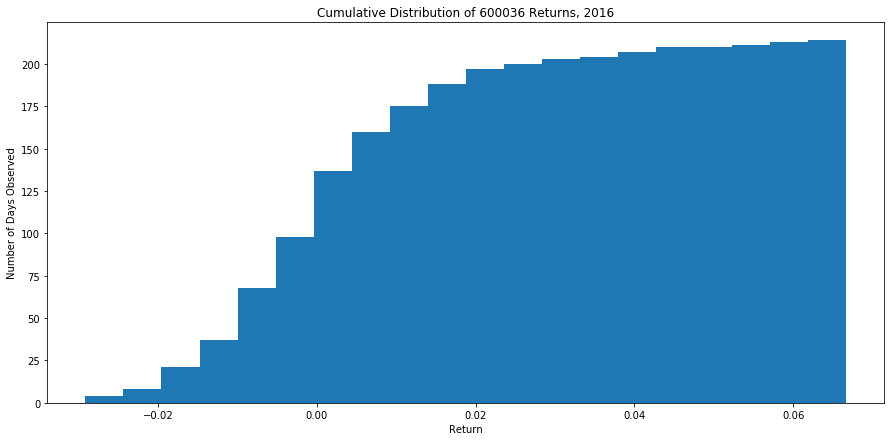

In [33]:
plt.figure(figsize=(15, 7))
plt.hist(R1, bins=20, cumulative=True)
plt.xlabel('Return')
plt.ylabel('Number of Days Observed')
plt.title('Cumulative Distribution of 600036 Returns, 2016')
plt.show()

### 散点图

In [36]:
stock2 = pd.read_excel('sz50.xlsx',sheetname='601318.XSHG', index_col='datetime')

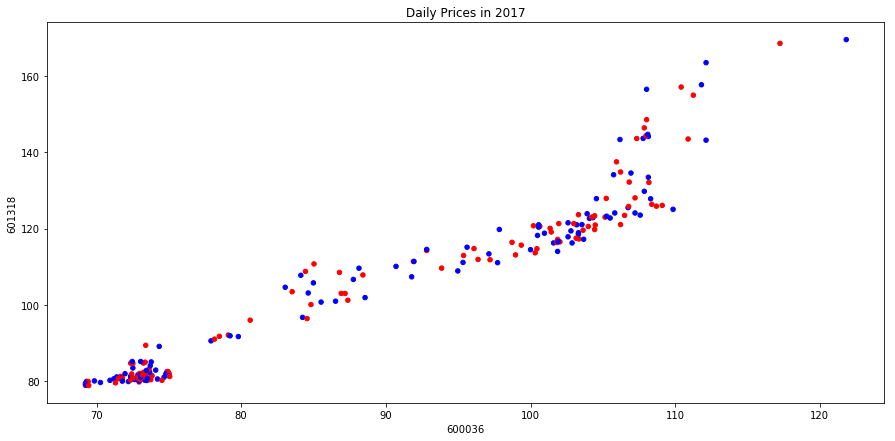

In [37]:
plt.figure(figsize=(15, 7))
plt.scatter(stock1.close, stock2.close, c = ['b','r'], s = 20)
plt.xlabel('600036')
plt.ylabel('601318')
plt.title('Daily Prices in 2017')
plt.show()

### 回报率散点图：

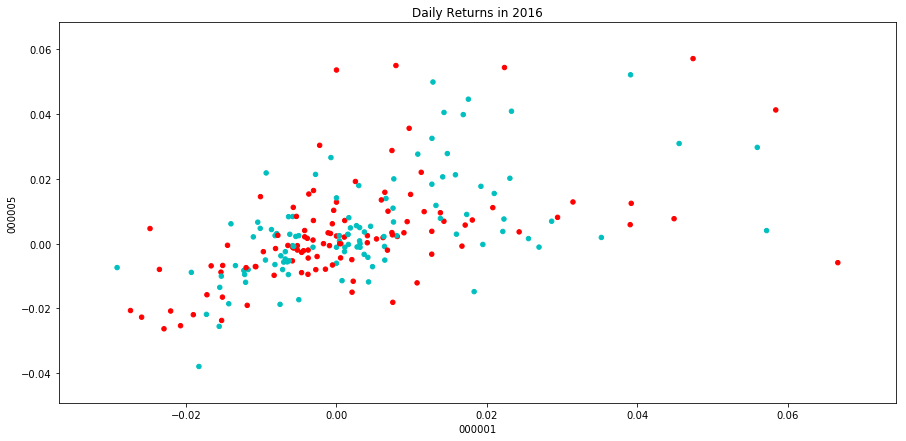

In [38]:
plt.figure(figsize=(15, 7))
R2 = stock2.close.pct_change()[1:]
plt.scatter(R1, R2,c=['c','r'],s=20)
plt.xlabel('000001')
plt.ylabel('000005')
plt.title('Daily Returns in 2016')
plt.show()

## 线图
画出价格线图。

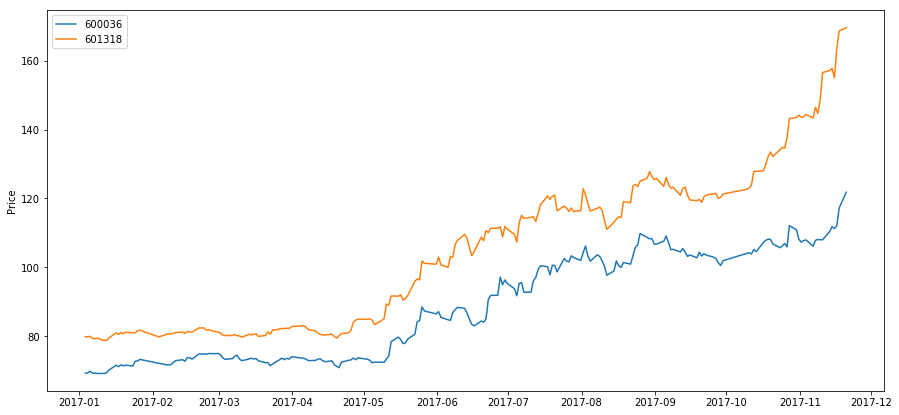

In [39]:
plt.figure(figsize=(15, 7))
plt.plot(stock1.close)
plt.plot(stock2.close)
plt.ylabel('Price')
plt.legend(['600036','601318'])
plt.show()

### 回报率线图


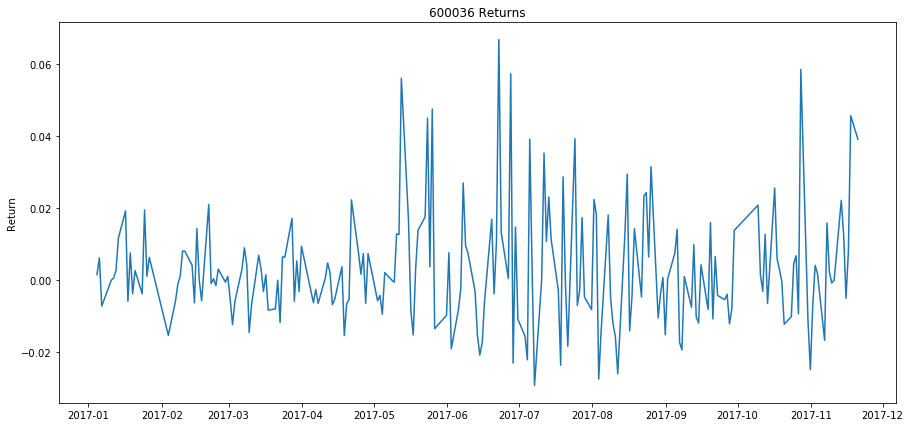

In [40]:
plt.figure(figsize=(15, 7))
plt.plot(R1)
plt.ylabel('Return')
plt.title('600036 Returns')
plt.show()

### 蜡烛图

In [41]:
from matplotlib.pylab import date2num

stock1['time'] = list(map(date2num, stock1.index))

In [42]:
candle = stock1.reindex_axis(["time", "open", "high", "low", "close"], 1).values

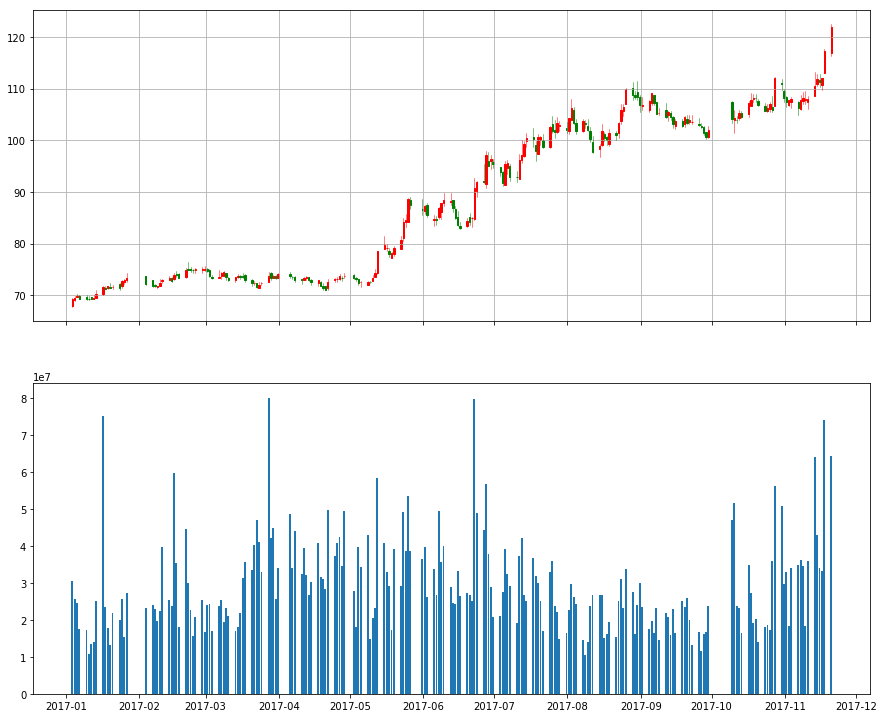

In [43]:
import matplotlib.finance as mpf
fig, (ax,ax1) = plt.subplots(2,1,sharex=True, figsize=(15,25))
fig.subplots_adjust(bottom=0.5)
ax.grid(True)
mpf.candlestick_ohlc(ax, candle, width=0.6, colorup='r', colordown='g',alpha=1.0)
ax1.bar(stock1.time,stock1.volume)
ax.xaxis_date ()
plt.show()

### 箱线图

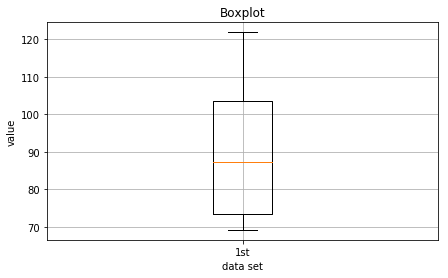

In [44]:
##箱线图
fig, ax = plt.subplots(figsize=(7, 4))
plt.boxplot(stock1.close)
plt.grid(True)
plt.setp(ax, xticklabels=['1st', '2nd'])
plt.xlabel('data set')
plt.ylabel('value')
plt.title('Boxplot')
plt.show()

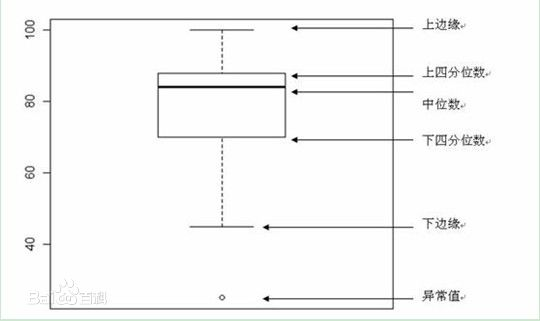

### steps-post

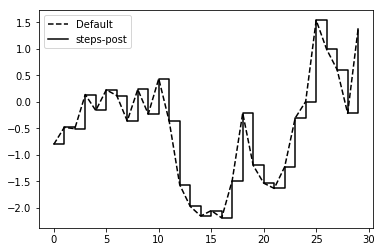

In [45]:
np.random.seed(1000)
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend()
plt.show()

### 3d绘图

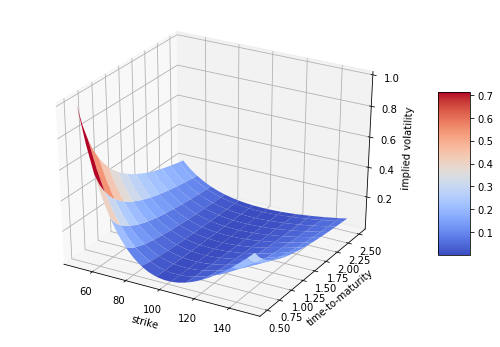

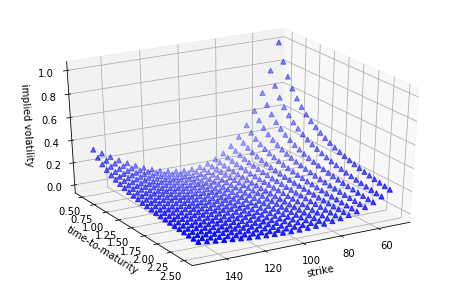

In [46]:
strike = np.linspace(50, 150, 24)
ttm = np.linspace(0.5, 2.5, 24)
strike, ttm = np.meshgrid(strike, ttm)

strike[:2]

iv = (strike - 100) ** 2 / (100 * strike) / ttm


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(strike, ttm, iv, rstride=2, cstride=2,
                       cmap=plt.cm.coolwarm, linewidth=0.5,
                       antialiased=True)
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')


fig.colorbar(surf, shrink=0.5, aspect=5)
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(30, 60)
ax.scatter(strike, ttm, iv, zdir='z', s=25,
           c='b', marker='^')
ax.set_xlabel('strike')
ax.set_ylabel('time-to-maturity')
ax.set_zlabel('implied volatility')
plt.show()

## #Figure的基础设置
**设置标题，轴标签，多图展示**

In [47]:
stock1 = pd.read_excel('sz50.xlsx',sheetname='601318.XSHG', index_col='datetime').close
stock2 = pd.read_excel('sz50.xlsx',sheetname='600000.XSHG', index_col='datetime').close
stock3 = pd.read_excel('sz50.xlsx',sheetname='600016.XSHG', index_col='datetime').close
stock4 = pd.read_excel('sz50.xlsx',sheetname='600028.XSHG', index_col='datetime').close

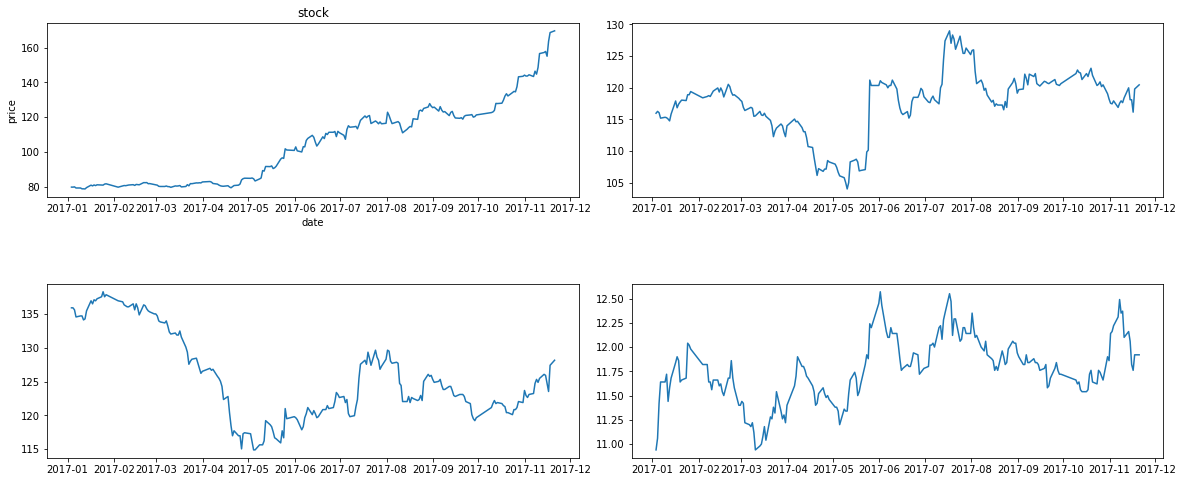

In [53]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(20, 8))
ax1.plot(stock1)
ax1.set_title('stock')
ax1.set_ylabel('price')
ax1.set_xlabel('date')
ax2.plot(stock2)
ax3.plot(stock3)
ax4.plot(stock4)
plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

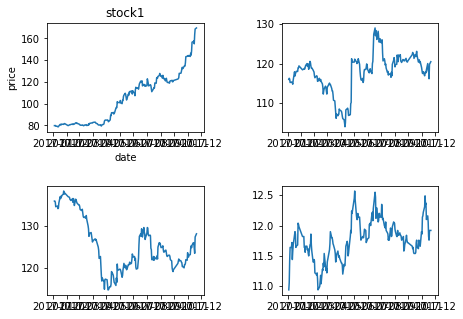

In [54]:
plt.figure(figsize=(7, 5))

plt.subplot(221)
plt.plot(stock1)
plt.xlabel('date')
plt.ylabel('price')
plt.title('stock1')

plt.subplot(222)
plt.plot(stock2)

plt.subplot(223)
plt.plot(stock3)

plt.subplot(224)
plt.plot(stock4)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()

## 双坐标以及显示图例

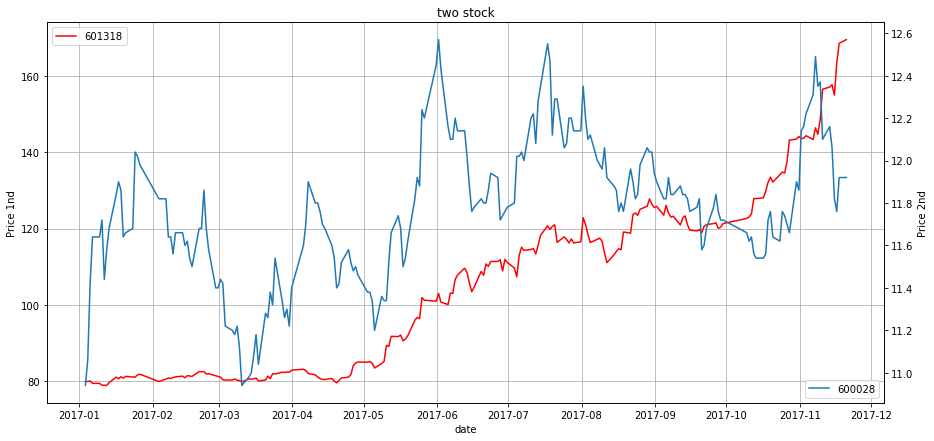

In [55]:
fig, ax1 = plt.subplots(figsize=(15, 7))
plt.plot(stock1,'r')
plt.grid(True)
plt.axis('tight')
plt.xlabel('date')
plt.ylabel('Price 1nd')
plt.title('two stock')
plt.legend(['601318'],loc =2)
ax2 = ax1.twinx()  #双坐标
plt.plot(stock4)
plt.ylabel('Price 2nd')
plt.legend(['600028'],loc = 4)
plt.show()

legend（）里的参数

'best'         : 0, (only implemented for axes legends)(自适应方式)

'upper right'   : 1,

'upper left'   : 2,

'lower left'   : 3,

'lower right'   : 4,

'right'     : 5,

'center left'  : 6,

'center right'  : 7,

'lower center'  : 8,

'upper center'  : 9,

'center'      : 10,

In [21]:
plt.plot?

### 课堂作业题  （线型、颜色、线宽、样式）
**填空题：根据以下要求填空**

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
x = np.linspace(0, 5, 10)
# #   line 1 -- line 4 ，线形图，蓝色线，线宽分别为 0.25 ，0.50 ， 1.00 ，2.00
ax.plot(x, x+1, color=?, linewidth=?)
ax.plot(x, x+2, ? ,?)
ax.plot(x, x+3, ? ,?)
ax.plot(x, x+4, ? ,?)

#   line 5 -- line 8 ，线形图，红色，线宽为2 ，线型（linestyle=）分别为 ‘-‘  ,‘-.’, ‘:’, ‘steps’
ax.plot(x, x+5, )
ax.plot(x, x+6, )
ax.plot(x, x+7, )
ax.plot(x, x+8, )

#   line 9 -- line 12 ，线形图，绿色，线宽为2 ， 线型为 ‘--’，点的样式（marker=） '+' , 'o' , 's' , '>'
# possible marker symbols: marker = '+', 'o', '*', 's', ',', '.', '1', '2', '3', '4', ...
ax.plot(x, x+ 9, )
ax.plot(x, x+10, )
ax.plot(x, x+11, )
ax.plot(x, x+12, )

#  line 13-- line 15，
#  线形图，紫色，线宽为1 ， 线型为 ‘-’，点的样式 'o'  ，样式尺寸（markersize）分别为 2,4,8 ，样式颜色（markerfacecolor）：红色
ax.plot(x, x+13, )
ax.plot(x, x+14, )
ax.plot(x, x+15, )

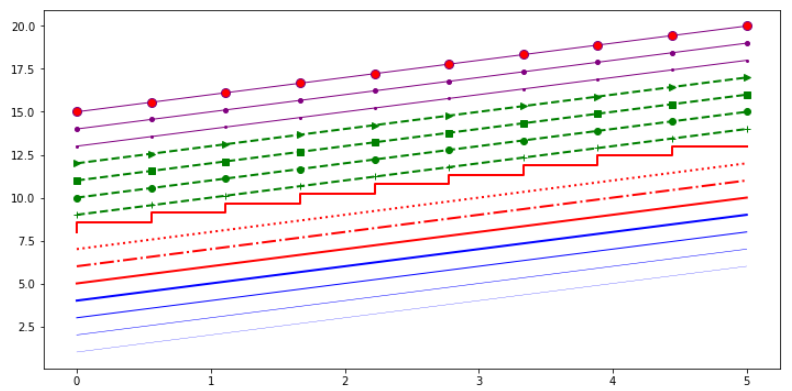